In [ ]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt

import mandelbrot_MC as mb
from mandelbrot_MC_solvers import PureRandomSampling, LatinHypercubeSampling, OrthogonalSampling

N_RUNS_STDERR = 10

In [2]:
xRes = 500
yRes = 500

xVals = np.linspace(mb.XMIN, mb.XMAX, xRes)
yVals = np.linspace(mb.YMIN, mb.YMAX, yRes)

d:\Documents\School\StochSim\Ass1\repo\mandelbrot_MC.py:29: RuntimeWarning: overflow encountered in power
  z = np.power(z, power) + val
d:\Documents\School\StochSim\Ass1\repo\mandelbrot_MC.py:29: RuntimeWarning: invalid value encountered in power
  z = np.power(z, power) + val


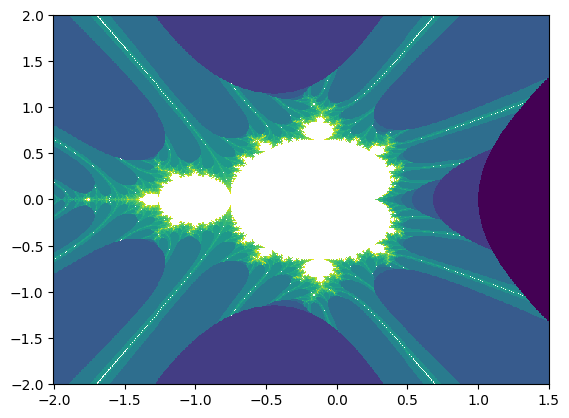

In [3]:
out = mb.mandelbrotDomain(xVals, yVals, 50, 2, 2)

fig, ax = plt.subplots()
ax.pcolormesh(xVals, yVals, out, norm=matplotlib.colors.LogNorm())
plt.show()

# Pure Random

## Single calculation

In [4]:
solver = PureRandomSampling()

nIter = 20000
nSamples = 20000

area, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

KeyboardInterrupt: 

Area1=1.5352


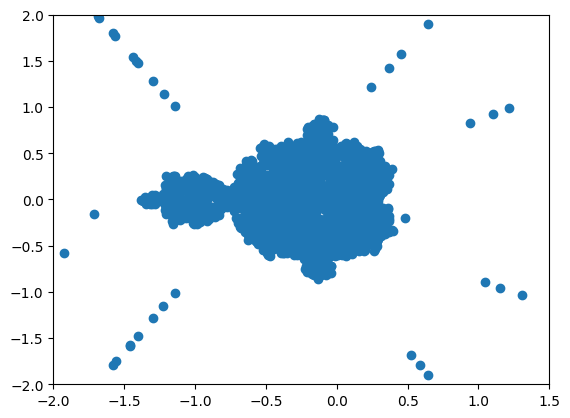

In [ ]:
fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
ax.set_xlim(mb.XMIN, mb.XMAX)
ax.set_ylim(mb.YMIN, mb.YMAX)
print(f"Area1={area}")
plt.show()

## Standard Error

In [ ]:
solver = PureRandomSampling()

minIter = 50
maxIter = 500
iterSteps = 10

minSamples = 500
maxSamples = 5000
sampleSteps = 10

nRuns = 10

samples = np.linspace(minSamples, maxSamples, iterSteps, dtype=int)
iterations = np.linspace(minIter, maxIter, sampleSteps, dtype=int)

stdsPR, areaPR = solver.iterSample_std(nRuns, iterations, samples, (20000,20000), verbose=True)

Run 0
t_nSamples: 15.73
Run 1
t_nSamples: 15.88
Run 2
t_nSamples: 15.86
Run 3
t_nSamples: 15.69
Run 4
t_nSamples: 15.79
Run 5
t_nSamples: 15.93
Run 6
t_nSamples: 15.64
Run 7
t_nSamples: 15.69
Run 8
t_nSamples: 15.67
Run 9
t_nSamples: 15.63


1.5008


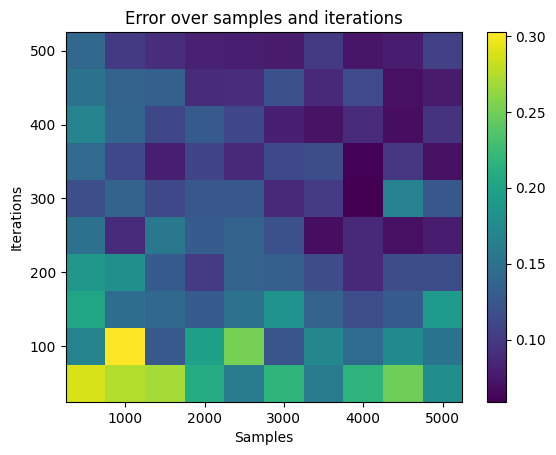

In [ ]:
print(areaPR)
lognorm = False

fig, ax = plt.subplots()
if lognorm:
    im = ax.pcolormesh(samples, iterations, stdsPR, norm=matplotlib.colors.LogNorm())
else:
    im = ax.pcolormesh(samples, iterations, stdsPR)
ax.set_xlabel("Samples")
# ax.set_xticks(samples)
ax.set_ylabel("Iterations")
# ax.set_yticks(iterations)
ax.set_title("Standard Error over samples and iterations")
fig.colorbar(im, ax = ax)
plt.show()

# Latin Hypercube

## Single Calculation

In [4]:
solver = LatinHypercubeSampling()

nIter = 20000
nSamples = 20000

area, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

Area=1.5504


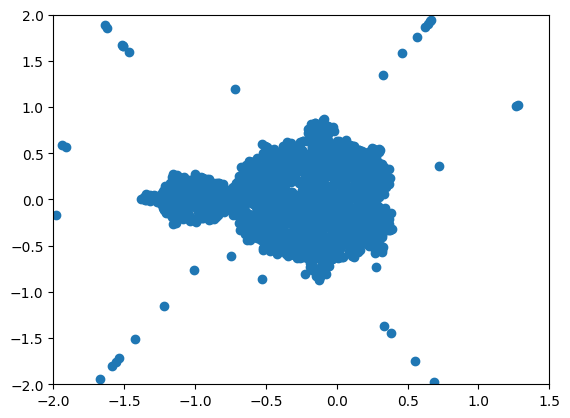

In [5]:
fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
ax.set_xlim(mb.XMIN, mb.XMAX)
ax.set_ylim(mb.YMIN, mb.YMAX)
print(f"Area={area}")
plt.show()

## Standard Error

In [ ]:
solver = LatinHypercubeSampling()

minIter = 50
maxIter = 500
iterSteps = 10

minSamples = 500
maxSamples = 5000
sampleSteps = 10

samples = np.linspace(minSamples, maxSamples, iterSteps, dtype=int)
iterations = np.linspace(minIter, maxIter, sampleSteps, dtype=int)

stdsLH, areaLH = solver.iterSample_std(N_RUNS_STDERR, iterations, samples, (20000,20000), verbose=True)

d:\Documents\School\StochSim\Ass1\repo\mandelbrot_MC.py:29: RuntimeWarning: overflow encountered in power
  z = np.power(z, power) + val
d:\Documents\School\StochSim\Ass1\repo\mandelbrot_MC.py:29: RuntimeWarning: invalid value encountered in power
  z = np.power(z, power) + val


Run 0
t_nSamples: 15.60
Run 1
t_nSamples: 15.67
Run 2
t_nSamples: 15.56
Run 3
t_nSamples: 15.46
Run 4
t_nSamples: 15.39
Run 5
t_nSamples: 15.52
Run 6
t_nSamples: 15.75
Run 7
t_nSamples: 15.71
Run 8
t_nSamples: 15.46
Run 9
t_nSamples: 15.57


1.572


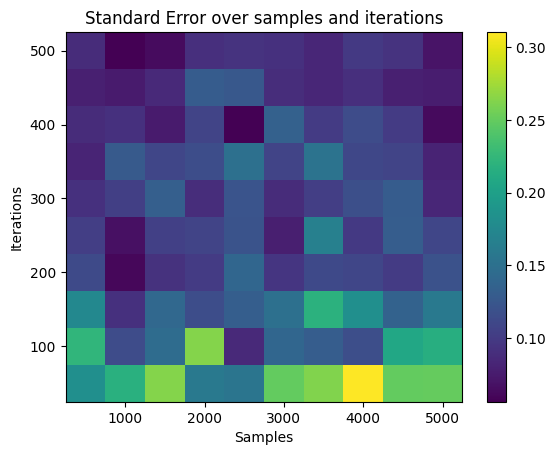

In [ ]:
print(areaPR)
lognorm = False

fig, ax = plt.subplots()
if lognorm:
    im = ax.pcolormesh(samples, iterations, stdsLH, norm=matplotlib.colors.LogNorm())
else:
    im = ax.pcolormesh(samples, iterations, stdsLH)
ax.set_xlabel("Samples")
# ax.set_xticks(samples)
ax.set_ylabel("Iterations")
# ax.set_yticks(iterations)
ax.set_title("Standard Error over samples and iterations")
fig.colorbar(im, ax = ax)
plt.show()

# Orthogonal Sampling
*Can only use prime squared numbered amounts of samples*

## Single Calculation

In [2]:
solver = OrthogonalSampling()

nIter = 20000
nSamples = 19321 # 139**2

area, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

d:\Documents\School\StochSim\Ass1\repo\mandelbrot_MC.py:29: RuntimeWarning: overflow encountered in power
  z = np.power(z, power) + val
d:\Documents\School\StochSim\Ass1\repo\mandelbrot_MC.py:29: RuntimeWarning: invalid value encountered in power
  z = np.power(z, power) + val


Area=1.554370891775788


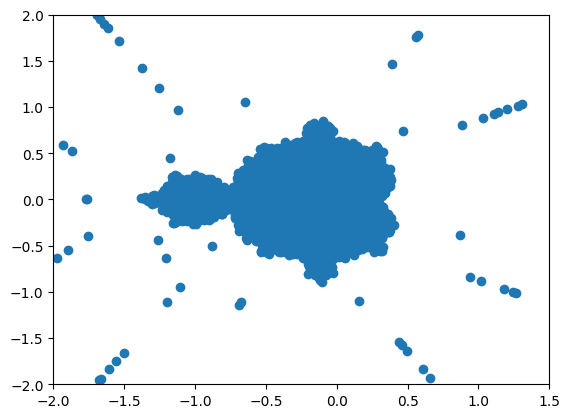

In [3]:
fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
ax.set_xlim(mb.XMIN, mb.XMAX)
ax.set_ylim(mb.YMIN, mb.YMAX)
print(f"Area={area}")
plt.show()

In [ ]:
# TODO: Nearest prime squared number for sample points